In [2]:
import Figtodat
from images2gif import writeGif
import numpy as np
import math

#helps mapping labels to integers
from sklearn import preprocessing 

# randomnize two numpy arrays
from sklearn.utils import shuffle

# for rotating figure from matplotlib
import scipy.ndimage

import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:


###

data = pd.read_csv( './../Dataset/simple_iris.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
#t_vector = np.atleast_2d( labels ).T
t_vector = labels

data.drop('Target', axis=1, inplace=True)
data.drop('Att3', axis=1, inplace=True)
data.drop('Att4', axis=1, inplace=True)
data.insert(0, "BIAS", np.ones(len(data)))
X_matrix = data.values

X_matrix, t_vector = shuffle(X_matrix, t_vector, random_state=0)

DATASET_LENGTH = X_matrix.shape[0] # rows
INPUTS_LENGTH = X_matrix.shape[1] # columns

print("inputs length")
print(INPUTS_LENGTH)
print("dataset length")
print(DATASET_LENGTH)

print(type(t_vector))
print(type(X_matrix))

inputs length
3
dataset length
150
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>


In [5]:
def unpickle( file ):
    import pickle
    fo = open(file, 'rb')
    dict = pickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( './../Dataset/cifar-10-batches-py/data_batch_1' )
 
X_matrix = data['data']
t_vector = data['labels']

dataframe = pd.DataFrame(X_matrix)
dataframe.insert(0, "BIAS", np.ones(len(X_matrix)))
X_matrix = dataframe.values
t_vector = np.atleast_2d( t_vector ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
t_vector[ t_vector < 5 ] = 0
t_vector[ t_vector >= 5 ] = 1

X_matrix, t_vector = shuffle(X_matrix, t_vector, random_state=0)

DATASET_LENGTH = X_matrix.shape[0] # rows
INPUTS_LENGTH = X_matrix.shape[1] # columns

print("inputs length")
print(INPUTS_LENGTH)
print("dataset length")
print(DATASET_LENGTH)

print(type(t_vector))
print(type(X_matrix))
print(X_matrix)

inputs length
3073
dataset length
10000
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
[[   1.   62.   59. ...,   54.   46.   37.]
 [   1.  217.  215. ...,  126.  128.  127.]
 [   1.  104.  130. ...,   44.   46.   45.]
 ..., 
 [   1.   86.   85. ...,   75.   75.   70.]
 [   1.  114.  131. ...,   39.   48.   88.]
 [   1.  179.  153. ...,  231.  233.  232.]]


In [6]:
# training perceptron
w_vector = np.random.rand(INPUTS_LENGTH) # last entry is for the bias

In [7]:
# activation function
def activation_function(entry):
    if entry >= 0:
        return 1
    else:
        return 0

In [8]:
def plot_figure(x, y, limits, title, x_label_name, y_label_name):
    plt.close("all")
    figure = plt.figure()
    figure.clf()
    
    axes = plt.gca()
    #axes.set_xlim(limits[0], limits[1])
    #axes.set_ylim(limits[2], limits[3])

    plt.plot(x, y)
    plt.ylabel(y_label_name)
    plt.xlabel(x_label_name)

    figure.suptitle(title, fontsize=20)
    plt.legend(loc='upper right')#,prop={'size':20}, bbox_to_anchor=(1, 0.5))
    #figure.set_size_inches(3, 2)

    return figure

In [9]:
def perceptron_figure(x_classifier, y_classifier, x_points, y_points, target_vector, boundary_limits):
    plt.close("all")
    figure = plt.figure()
    figure.clf()
    
    colors = ['green','purple']
    
    axes = plt.gca()
    axes.set_xlim(boundary_limits[0], boundary_limits[1])
    axes.set_ylim(boundary_limits[2], boundary_limits[3])

    plt.scatter(x_points, y_points, c=target_vector, cmap=matplotlib.colors.ListedColormap(colors))
    plt.plot(x_classifier, y_classifier, linewidth=3.0)
    
    plt.ylabel("First Attribute")
    plt.xlabel("Second Attribute")

    figure.suptitle("First Two Dimensions - Boundary Line", fontsize=20)
    plt.legend(loc='upper right')#,prop={'size':20}, bbox_to_anchor=(1, 0.5))
    #figure.set_size_inches(3, 2)

    return figure

In [10]:
EPOCHS = 150
LEARNING_RATE = 0.00001

In [11]:
boundary_x_start, boundary_x_end = X_matrix[:, 1].min() - 1, X_matrix[:, 1].max() + 1
boundary_y_start, boundary_y_end = X_matrix[:, 2].min() - 1, X_matrix[:, 2].max() + 1
boundary_limits = (boundary_x_start, boundary_x_end, boundary_y_start, boundary_y_end)

error_x_start, error_x_end = 0, EPOCHS
error_y_start, error_y_end = 0, 50#5000
error_limits = (error_x_start, error_x_end, error_y_start, error_y_end)

accuracy_x_start, accuracy_x_end = 0, EPOCHS
accuracy_y_start, accuracy_y_end = 0, 1
accuracy_limits = (accuracy_x_start, accuracy_x_end, accuracy_y_start, accuracy_y_end)

norm_x_start, norm_x_end = 0, EPOCHS
norm_y_start, norm_y_end = 0, 500
norm_limits = (norm_x_start, norm_x_end, norm_y_start, norm_y_end)

In [12]:
scatter_x_coordinates = np.linspace(boundary_x_start, boundary_x_end)
plot_x_coordinates = np.linspace(0, EPOCHS, num=EPOCHS)

error_y_coordinates = np.zeros(EPOCHS)
accuracy_y_coordinates = np.zeros(EPOCHS)
norm_y_coordinates = np.zeros(EPOCHS)

/home/isai/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
Figtodat.py:46: RuntimeWarning: the frombuffer defaults may change in a future release; for portability, change the call to read:
  frombuffer(mode, size, data, 'raw', mode, 0, 1)
  im=PIL.Image.frombuffer( "RGBA", ( w ,h ), buf.tostring())


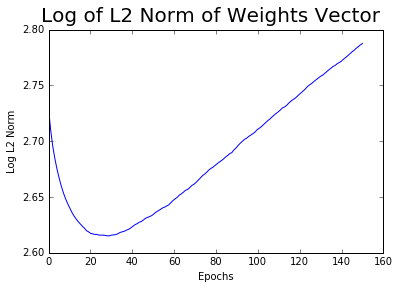

In [13]:
# Lists that hold the figures from matplotlib to make GIF images
boundary_images = list()
error_images = list()
accuracy_images = list()
norm_images = list()

# Training the perceptron
for epoch in range(0,EPOCHS):
    
    # Shuffleling data points to help the perceptron converge faster
    X_matrix, t_vector = shuffle(X_matrix, t_vector, random_state=0)
    
    # Variables that hold data for the plots
    global_error = 0
    global_accuracy = 0
    
    # Using the weigths of the perceptron to draw the decision boundary line of the perceptron
    a, b = -w_vector[1]/w_vector[2], -w_vector[0]/w_vector[2]
    scatter_y_coordinates = a * scatter_x_coordinates + b
    
    # Appending figures to a list to make the perceptron boundary GIF
    boundary_figure = perceptron_figure(scatter_x_coordinates, scatter_y_coordinates, X_matrix[:,1], X_matrix[:,2], t_vector, boundary_limits)
    boundary_image = Figtodat.fig2img(boundary_figure)
    boundary_images.append(boundary_image)
    
    # Perceptron
    for row in range(0,DATASET_LENGTH-1):
        x_vector = X_matrix[row] 
        z_scalar = activation_function(np.dot(w_vector, x_vector))
        t_scalar = t_vector[row]
        error = t_scalar - z_scalar
        w_vector = w_vector + (LEARNING_RATE * error * x_vector)
        
        # Computing stuff for the plots
        global_error = global_error + (error * error)
        global_accuracy = global_accuracy + 1.0 if error == 0 else 0.0
        
    error_y_coordinates[epoch] = global_error
    accuracy_y_coordinates[epoch] = global_accuracy / DATASET_LENGTH
    norm_y_coordinates[epoch] = math.log(math.sqrt(np.dot(w_vector, w_vector)))#np.linalg.norm(w_vector)
    
    # Appending figures to a list to make the error plot GIF
    error_figure = plot_figure(plot_x_coordinates, error_y_coordinates, error_limits, "Sum of Squares Error", "Epochs", "SSE")
    error_image = Figtodat.fig2img(error_figure)
    error_images.append(error_image)
    
    # Appending figures to a list to make the accuracy plot GIF
    accuracy_figure = plot_figure(plot_x_coordinates, accuracy_y_coordinates, accuracy_limits, "Perceptron Accuracy", "Epochs", "Accuracy")
    accuracy_image = Figtodat.fig2img(accuracy_figure)
    accuracy_images.append(accuracy_image)
    
    # Appending figures to a list to make the norm plot GIF
    norm_figure = plot_figure(plot_x_coordinates, norm_y_coordinates, norm_limits, "Log of L2 Norm of Weights Vector", "Epochs", "Log L2 Norm")
    norm_image = Figtodat.fig2img(norm_figure)
    norm_images.append(norm_image)

# Making GIF images
name = "cifar10_c000001"
writeGif("images/" + name + "_boundary.gif", boundary_images, duration=0.1, repeat=1)
writeGif("images/" + name + "_error.gif", error_images, duration=0.1, repeat=1)
writeGif("images/" + name + "_accuracy.gif", accuracy_images, duration=0.1, repeat=1)
writeGif("images/" + name + "_norm.gif", norm_images, duration=0.1, repeat=1)
            
            
        

# Iris Dataset with Learning Rate = 1
<img src="images/iris_c1_boundary.gif" style="float: left;"> 
<img src="images/iris_c1_error.gif" style="float: right;">
<br>
<img src="images/iris_c1_accuracy.gif" style="float: left;"> 
<img src="images/iris_c1_norm.gif" style="float: right;">
<br>

# Iris Dataset with Learning Rate = 0.1
<img src="images/iris_c01_boundary.gif" style="float: left;"> 
<img src="images/iris_c01_error.gif" style="float: right;">
<br>
<img src="images/iris_c01_accuracy.gif" style="float: left;"> 
<img src="images/iris_c01_norm.gif" style="float: right;">
<br>

# Iris Dataset with Learning Rate = 0.01
<img src="images/iris_c001_boundary.gif" style="float: left;"> 
<img src="images/iris_c001_error.gif" style="float: right;">
<br>
<img src="images/iris_c001_accuracy.gif" style="float: left;"> 
<img src="images/iris_c001_norm.gif" style="float: right;">
<br>

# Cifar10 Dataset with Learning Rate = 0.001
<img src="images/cifar10_c0001_boundary.gif" style="float: left;"> 
<img src="images/cifar10_c0001_error.gif" style="float: right;">
<br>
<img src="images/cifar10_c0001_accuracy.gif" style="float: left;"> 
<img src="images/cifar10_c0001_norm.gif" style="float: right;">
<br>

# Cifar10 Dataset with Learning Rate = 0.00001
<img src="images/cifar10_c000001_boundary.gif" style="float: left;"> 
<img src="images/cifar10_c000001_error.gif" style="float: right;">
<br>
<img src="images/cifar10_c000001_accuracy.gif" style="float: left;"> 
<img src="images/cifar10_c000001_norm.gif" style="float: right;">
<br>